## 1.  Análisis exploratorio y visualización de los datos

In [1]:
import pandas as pd

In [4]:
df = pd.read_csv("https://exoplanetarchive.ipac.caltech.edu/cgi-bin/nstedAPI/nph-nstedAPI?table=cumulative&select=kepid,kepoi_name,koi_disposition,koi_period,koi_impact,koi_duration,koi_depth,koi_prad,koi_teq,koi_insol,koi_model_snr&format=csv")

In [5]:
print(df)

         kepid kepoi_name koi_disposition  koi_period  koi_impact  \
0     10797460  K00752.01       CONFIRMED    9.488036       0.146   
1     10797460  K00752.02       CONFIRMED   54.418383       0.586   
2     10811496  K00753.01       CANDIDATE   19.899140       0.969   
3     10848459  K00754.01  FALSE POSITIVE    1.736952       1.276   
4     10854555  K00755.01       CONFIRMED    2.525592       0.701   
...        ...        ...             ...         ...         ...   
9559  10090151  K07985.01  FALSE POSITIVE    0.527699       1.252   
9560  10128825  K07986.01       CANDIDATE    1.739849       0.043   
9561  10147276  K07987.01  FALSE POSITIVE    0.681402       0.147   
9562  10155286  K07988.01       CANDIDATE  333.486169       0.214   
9563  10156110  K07989.01  FALSE POSITIVE    4.856035       0.134   

      koi_duration  koi_depth  koi_prad  koi_teq  koi_insol  koi_model_snr  
0          2.95750      615.8      2.26    793.0      93.59           35.8  
1          4.5070

In [6]:
df.shape

(9564, 11)

In [7]:
print(df.columns)

Index(['kepid', 'kepoi_name', 'koi_disposition', 'koi_period', 'koi_impact',
       'koi_duration', 'koi_depth', 'koi_prad', 'koi_teq', 'koi_insol',
       'koi_model_snr'],
      dtype='object')


In [8]:
df_clean = df.dropna().reset_index(drop=True)
print(df_clean.columns)

Index(['kepid', 'kepoi_name', 'koi_disposition', 'koi_period', 'koi_impact',
       'koi_duration', 'koi_depth', 'koi_prad', 'koi_teq', 'koi_insol',
       'koi_model_snr'],
      dtype='object')


In [9]:
planet_radius = df_clean['koi_prad']
print(planet_radius)

0        2.26
1        2.83
2       14.60
3       33.46
4        2.75
        ...  
9196    29.35
9197     0.72
9198     1.07
9199    19.30
9200     1.05
Name: koi_prad, Length: 9201, dtype: float64


In [10]:
media = planet_radius.mean()
print(media)

102.89177806760135


In [11]:
mediana = planet_radius.median()
print(mediana)

2.39


In [12]:
from scipy.stats import trim_mean
tr_prad=trim_mean(planet_radius,0.2)
print(f'La media truncada es: {tr_prad}')

La media truncada es: 4.664966491577612


In [13]:
standar_deviation = planet_radius.std()
print(f'La desviación estándar es: {standar_deviation}')

La desviación estándar es: 3077.6391262221828


In [14]:
maximun = planet_radius.max()
print(f'El valor máximo del radio planetario es: {maximun}')

El valor máximo del radio planetario es: 200346.0


In [15]:
minimun = planet_radius.min()
print(f'El valor mínimo del radio planetario es: {minimun}')

El valor mínimo del radio planetario es: 0.08


In [16]:
primer_cuartil = planet_radius.quantile(0.25)
tercer_cuartil = planet_radius.quantile(0.75)
print(f'El primer cuartil es: {primer_cuartil}, y el tercer cuartil es: {tercer_cuartil}')

El primer cuartil es: 1.4, y el tercer cuartil es: 14.93


In [17]:
iqr = planet_radius.quantile(0.75)-planet_radius.quantile(0.25)
print(f'El rango intercuartil es: {iqr}')

El rango intercuartil es: 13.53


In [18]:
asimetria = planet_radius.skew()
print(f'La asimetria es: {asimetria}')

La asimetria es: 52.11895420603228


In [19]:
curtosis = planet_radius.kurtosis()
print(f'La curtosis es: {curtosis}')

La curtosis es: 2974.9107107967575


In [20]:
def truncar_valores(df, columna):
    Q1 = df[columna].quantile(0.25)
    Q3 = df[columna].quantile(0.75)
    IQR = Q3 - Q1
    limite_inferior = Q1 - 2 * IQR
    limite_superior = Q3 + 2 * IQR
    valores_truncados = df[(df[columna] >= limite_inferior) & (df[columna] <= limite_superior)]
    return valores_truncados

In [21]:
valores_truncados = truncar_valores(df, 'koi_prad')

In [22]:
planet_radius_truncado = valores_truncados['koi_prad']
print(planet_radius_truncado)

0        2.26
1        2.83
2       14.60
3       33.46
4        2.75
        ...  
9559    29.35
9560     0.72
9561     1.07
9562    19.30
9563     1.05
Name: koi_prad, Length: 7967, dtype: float64


In [23]:
media_truncada = planet_radius_truncado.mean()
print(f'Media truncada: {media_truncada}')

Media truncada: 5.983313668884147


In [24]:
mediana_truncada = planet_radius_truncado.median()
print(f'Mediana truncada: {mediana_truncada}')

Mediana truncada: 2.08


In [25]:
standar_deviation_truncada = planet_radius_truncado.std()
print(f'Desviación estándar truncada: {standar_deviation_truncada}')

Desviación estándar truncada: 9.339570494258066


In [26]:
tr_prad_truncado = trim_mean(planet_radius_truncado, 0.2)
print(f'Trimmed mean truncada: {tr_prad_truncado}')

Trimmed mean truncada: 2.3407948128006693


In [27]:
maximun_truncado = planet_radius_truncado.max()
print(f'Máximo truncado: {maximun_truncado}')

Máximo truncado: 41.84


In [28]:
minimun_truncado = planet_radius_truncado.min()
print(f'Mínimo truncado: {minimun_truncado}')

Mínimo truncado: 0.08


In [29]:
primer_cuartil_truncado = planet_radius_truncado.quantile(0.25)
print(f'Primer cuartil truncado: {primer_cuartil_truncado}')

Primer cuartil truncado: 1.31


In [30]:
tercer_cuartil_truncado = planet_radius_truncado.quantile(0.75)
print(f'Tercer cuartil truncado: {tercer_cuartil_truncado}')

Tercer cuartil truncado: 3.9450000000000003


In [31]:
iqr_truncado = tercer_cuartil_truncado - primer_cuartil_truncado
print(f'Rango intercuartílico truncado: {iqr_truncado}')

Rango intercuartílico truncado: 2.6350000000000002


In [32]:
asimetria_truncada = planet_radius_truncado.skew()
print(f'Asimetría truncada: {asimetria_truncada}')

Asimetría truncada: 2.2853973411240904


In [33]:
curtosis_truncada = planet_radius_truncado.kurtosis()
print(f'Curtosis truncada: {curtosis_truncada}')

Curtosis truncada: 4.165212647859917


In [34]:
import seaborn as sns
import matplotlib.pyplot as plt

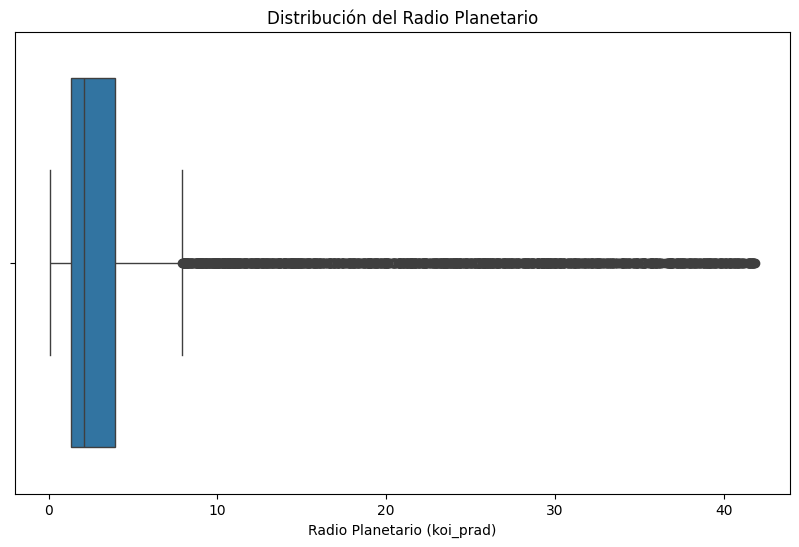

In [35]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=planet_radius_truncado)
plt.title('Distribución del Radio Planetario')
plt.xlabel('Radio Planetario (koi_prad)')
plt.show()

In [40]:
import numpy as np

In [41]:
N = len(planet_radius_truncado )
k = int(1 + np.log2(N))
print(f'Número óptimo de intervalos según la regla de Sturge: {k}')

Número óptimo de intervalos según la regla de Sturge: 13


In [44]:
bins = np.linspace(planet_radius_truncado .min(), planet_radius_truncado .max(), k + 1)
intervalos = pd.cut(planet_radius_truncado , bins=bins)

In [46]:
intervalos_count = planet_radius_truncado.groupby(intervalos).size()
print(f'Número de valores por intervalo: {intervalos_count}')

Número de valores por intervalo: koi_prad
(0.08, 3.292]       5690
(3.292, 6.505]       693
(6.505, 9.717]       237
(9.717, 12.929]      181
(12.929, 16.142]     148
(16.142, 19.354]     122
(19.354, 22.566]     135
(22.566, 25.778]     153
(25.778, 28.991]     141
(28.991, 32.203]     134
(32.203, 35.415]     106
(35.415, 38.628]     112
(38.628, 41.84]      114
Name: koi_prad, dtype: int64


C:\Users\Sital\AppData\Local\Temp\ipykernel_9584\1815611245.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  intervalos_count = planet_radius_truncado.groupby(intervalos).size()


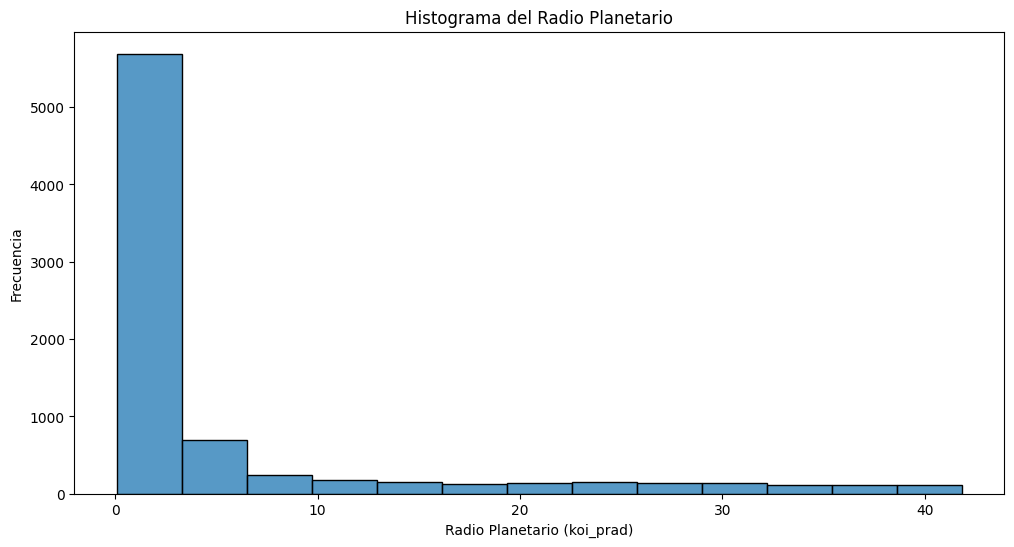

In [47]:
plt.figure(figsize=(12, 6))
sns.histplot(planet_radius_truncado , bins=k, kde=False)
plt.title('Histograma del Radio Planetario')
plt.xlabel('Radio Planetario (koi_prad)')
plt.ylabel('Frecuencia')
plt.show()

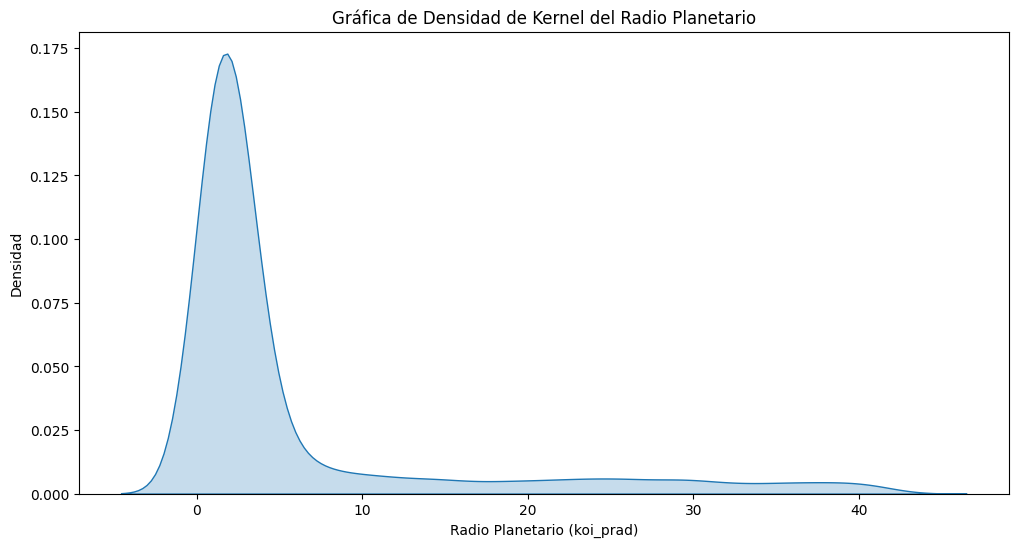

In [48]:
plt.figure(figsize=(12, 6))
sns.kdeplot(planet_radius_truncado , fill=True)
plt.title('Gráfica de Densidad de Kernel del Radio Planetario')
plt.xlabel('Radio Planetario (koi_prad)')
plt.ylabel('Densidad')
plt.show()

## 2. Teorema del límite central

In [49]:
import random

In [50]:
def bootstrap_muestras(data, N, num_muestras=100000):
    medias_bootstrap = []

    for _ in range(num_muestras):
        muestra = random.choices(data, k=N)
        media_muestra = sum(muestra) / len(muestra)
        medias_bootstrap.append(media_muestra)
    return medias_bootstrap

In [51]:
N = int(np.floor(0.2 * len(planet_radius_truncado)))
medias_bootstrap = bootstrap_muestras(planet_radius_truncado.dropna().tolist(), N)
print(medias_bootstrap[:10])

[5.757256748273697, 6.411851851851853, 5.912931575643434, 5.573377275580667, 6.042893910860014, 5.738430634023846, 5.782253609541749, 6.028618957940989, 5.755976145637163, 6.016553672316385]


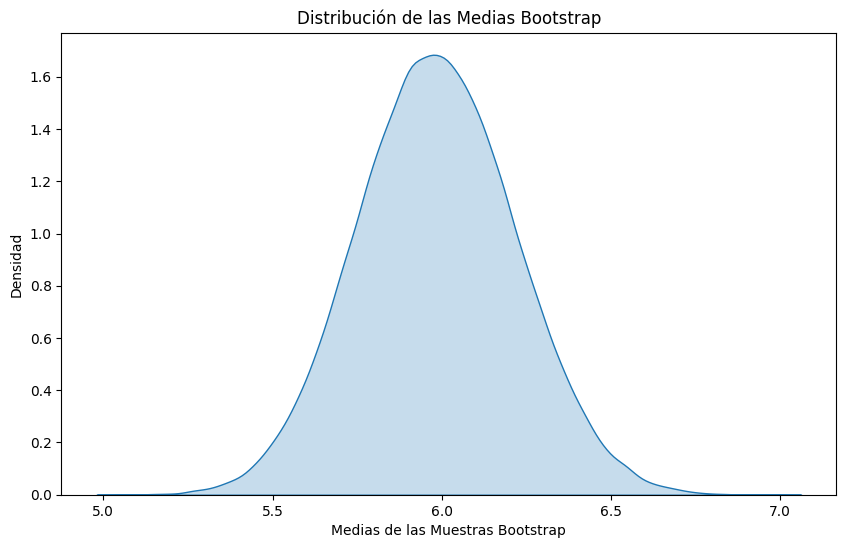

In [52]:
plt.figure(figsize=(10, 6))
sns.kdeplot(medias_bootstrap, fill=True)
plt.title('Distribución de las Medias Bootstrap')
plt.xlabel('Medias de las Muestras Bootstrap')
plt.ylabel('Densidad')
plt.show()

In [53]:
from scipy.stats import skew, kurtosis

In [54]:
desviacion_estandar_bootstrap = np.std(medias_bootstrap)
print(f'Desviación estándar de las medias bootstrap: {desviacion_estandar_bootstrap}')

Desviación estándar de las medias bootstrap: 0.23394269572690476


In [55]:
asimetria_bootstrap = skew(medias_bootstrap)
print(f'Asimetría (Skewness) de las medias bootstrap: {asimetria_bootstrap}')

Asimetría (Skewness) de las medias bootstrap: 0.052012762822843665


In [56]:
curtosis_bootstrap = kurtosis(medias_bootstrap)
print(f'Curtosis de las medias bootstrap: {curtosis_bootstrap}')

Curtosis de las medias bootstrap: -0.02240665172859746


In [60]:
desviacion_estandar_inferida = standar_deviation_truncada / np.sqrt(planet_radius_truncado.size*0.2)
print(f'Desviación estándar inferida a partir de la población y tamaño de muestra: {desviacion_estandar_inferida}')

Desviación estándar inferida a partir de la población y tamaño de muestra: 0.23397232896216555


In [61]:
print(f'Desviación estándar de las medias bootstrap: {desviacion_estandar_bootstrap}')

Desviación estándar de las medias bootstrap: 0.23394269572690476


In [62]:
diferencia = desviacion_estandar_bootstrap - desviacion_estandar_inferida
print(f"\nDiferencia entre desviación estándar observada y teórica: {diferencia:.2f}")


Diferencia entre desviación estándar observada y teórica: -0.00


In [67]:
intervalos_confianza = {
    "Intervalo de confianza al 90%": [np.quantile(medias_bootstrap, 0.05), np.quantile(medias_bootstrap, 0.95)],
    "Intervalo de confianza al 95%": [np.quantile(medias_bootstrap, 0.025), np.quantile(medias_bootstrap, 0.975)],
    "Intervalo de confianza al 99%": [np.quantile(medias_bootstrap, 0.005), np.quantile(medias_bootstrap, 0.995)]
}

In [68]:
for nivel_confianza, intervalo in intervalos_confianza.items():
    print(f"{nivel_confianza}: {intervalo[0]:.2f} a {intervalo[1]:.2f}")

Intervalo de confianza al 90%: 5.60 a 6.37
Intervalo de confianza al 95%: 5.53 a 6.45
Intervalo de confianza al 99%: 5.39 a 6.59


## 3. Análisis de las variables categóricas y pruebas A/B

In [71]:
def filter(df, column, valor):
  iqr_col = df[column].quantile(0.75) - df[column].quantile(0.25)
  filter_min = df[column] > df[column].quantile(0.25) - iqr_col * valor
  filter_max = df[column] < df[column].quantile(0.75) +   iqr_col* valor
  return df[filter_min & filter_max]
df_filtred = filter(df_clean, 'koi_prad', 2)
planet_radius_truncado = df_filtred['koi_prad']

In [76]:
conteo_categorias = df_filtred['koi_disposition'].value_counts().reset_index()
print(conteo_categorias)

  koi_disposition  count
0  FALSE POSITIVE   3391
1       CONFIRMED   2738
2       CANDIDATE   1838


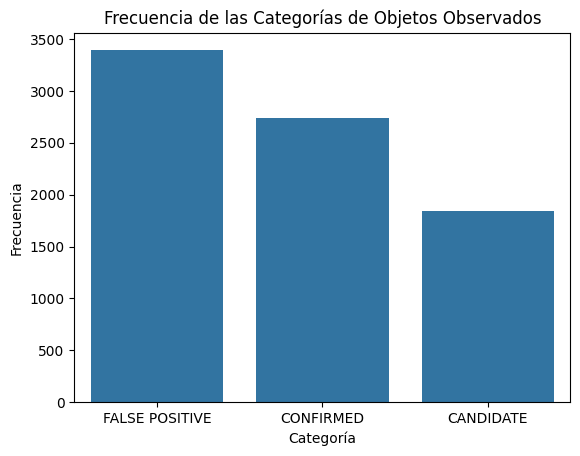

In [78]:
sns.barplot(data = conteo_categorias, x = 'koi_disposition', y = 'count')
plt.title('Frecuencia de las Categorías de Objetos Observados')
plt.xlabel('Categoría')
plt.ylabel('Frecuencia')
plt.show()

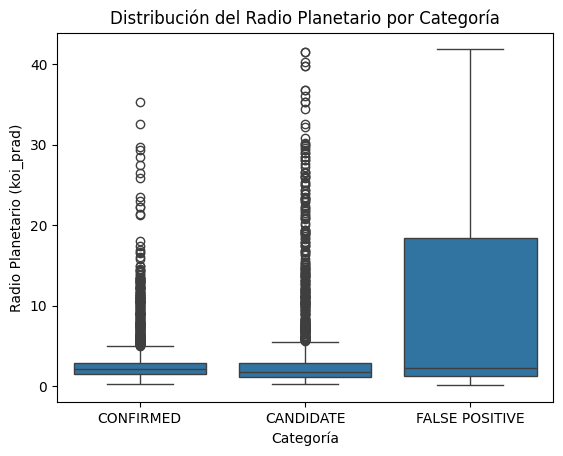

In [79]:
sns.boxplot(data = df_filtred, x='koi_disposition', y='koi_prad')
plt.title('Distribución del Radio Planetario por Categoría')
plt.xlabel('Categoría')
plt.ylabel('Radio Planetario (koi_prad)')
plt.show()

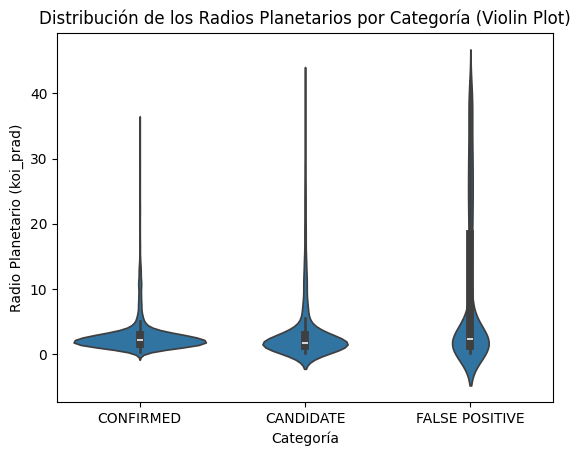

In [81]:
# Más detalles de la distribución.

sns.violinplot(data = df_filtred, x='koi_disposition', y='koi_prad')
plt.title('Distribución de los Radios Planetarios por Categoría (Violin Plot)')
plt.xlabel('Categoría')
plt.ylabel('Radio Planetario (koi_prad)')
plt.show()

In [82]:
df_confirmado = df_filtred[df_filtred['koi_disposition'] == 'CONFIRMED']
df_candidato = df_filtred[df_filtred['koi_disposition'] == 'CANDIDATE']
df_falso_positivo = df_filtred[df_filtred['koi_disposition'] == 'FALSE POSITIVE']

In [83]:
radios_confirmado = df_confirmado['koi_prad']
radios_candidato = df_candidato['koi_prad']
radios_falso_positivo = df_falso_positivo['koi_prad']

In [84]:
print("Radios planetarios - Confirmados:")
print(radios_confirmado.head())
print("\nRadios planetarios - Candidatos:")
print(radios_candidato.head())
print("\nRadios planetarios - Falso Positivo:")
print(radios_falso_positivo.head())

Radios planetarios - Confirmados:
0    2.26
1    2.83
4    2.75
5    3.90
6    2.77
Name: koi_prad, dtype: float64

Radios planetarios - Candidatos:
2     14.60
58     7.51
62    19.45
63     0.55
84     7.73
Name: koi_prad, dtype: float64

Radios planetarios - Falso Positivo:
3     33.46
8     39.21
15     7.18
17     7.94
20     1.58
Name: koi_prad, dtype: float64


In [85]:
from scipy.stats import trim_mean

In [86]:
media_recortada_confirmado = trim_mean(radios_confirmado.dropna(), 0.2)
media_recortada_candidato = trim_mean(radios_candidato.dropna(), 0.2)
media_recortada_falso_positivo = trim_mean(radios_falso_positivo.dropna(), 0.2)

In [87]:
print(f"Media recortada (20%) para planetas confirmados: {media_recortada_confirmado:.2f}")
print(f"Media recortada (20%) para candidatos: {media_recortada_candidato:.2f}")
print(f"Media recortada (20%) para falsos positivos: {media_recortada_falso_positivo:.2f}")

Media recortada (20%) para planetas confirmados: 2.17
Media recortada (20%) para candidatos: 1.86
Media recortada (20%) para falsos positivos: 5.47


In [88]:
desviacion_estandar_confirmado = radios_confirmado.dropna().std()
desviacion_estandar_candidato = radios_candidato.dropna().std()

print(f"Desviación estándar para planetas confirmados: {desviacion_estandar_confirmado:.2f}")
print(f"Desviación estándar para candidatos: {desviacion_estandar_candidato:.2f}")

Desviación estándar para planetas confirmados: 2.78
Desviación estándar para candidatos: 5.62


In [89]:
from scipy.stats import levene

In [90]:
stat, p_value = levene(radios_confirmado.dropna(), radios_candidato.dropna())

print(f"Estadístico de Levene: {stat:.2f}")
print(f"Valor p: {p_value:.5f}")

alpha = 0.05  # Nivel de significancia del 5%
if p_value > alpha:
    print("No se rechaza la hipótesis nula: Las varianzas son iguales.")
else:
    print("Se rechaza la hipótesis nula: Las varianzas no son iguales.")

Estadístico de Levene: 97.91
Valor p: 0.00000
Se rechaza la hipótesis nula: Las varianzas no son iguales.


In [92]:
from scipy.stats import ttest_ind

In [95]:
stat, p_value = ttest_ind(radios_confirmado.dropna(), radios_candidato.dropna(), equal_var=False, trim =0.2)
print(f"Estadístico t: {stat:.2f}")
print(f"Valor p: {p_value:}")

if p_value < 0.005:
    print("Se rechaza la hipótesis nula: Las medias recortadas no son iguales.")
else:
    print("No se rechaza la hipótesis nula: Las medias recortadas son iguales.")

Estadístico t: 7.55
Valor p: 6.79110111607123e-14
Se rechaza la hipótesis nula: Las medias recortadas no son iguales.


In [99]:
stat2, p_value2 = ttest_ind(radios_confirmado.dropna(), radios_candidato.dropna(), equal_var=False, trim =0.2, alternative='less')
print(f"Estadístico t: {stat2:.2f}")
print(f"Valor p: {p_value2:}")

if p_value2 < 0.005:
    print("Se rechaza la hipótesis nula: La media recortada de CONFIRMED es mayor que la de CANDIDATE.")
else:
    print("No se rechaza la hipótesis nula: No se puede concluir que la media recortada de CONFIRMED sea mayor.")

Estadístico t: 7.55
Valor p: 0.999999999999966
No se rechaza la hipótesis nula: No se puede concluir que la media recortada de CONFIRMED sea mayor.
